In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#Checking shape
df.shape

(18249, 14)

In [4]:
#deleting Unnamed: 0 column as it is not needed
df.drop('Unnamed: 0', axis=1,inplace=True)

In [5]:
#checking for null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
# checking for any duplicate row
df.duplicated().sum()

0

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
df.shape

(18249, 13)

In [10]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [11]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
37815

In [12]:
#statistical summary
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


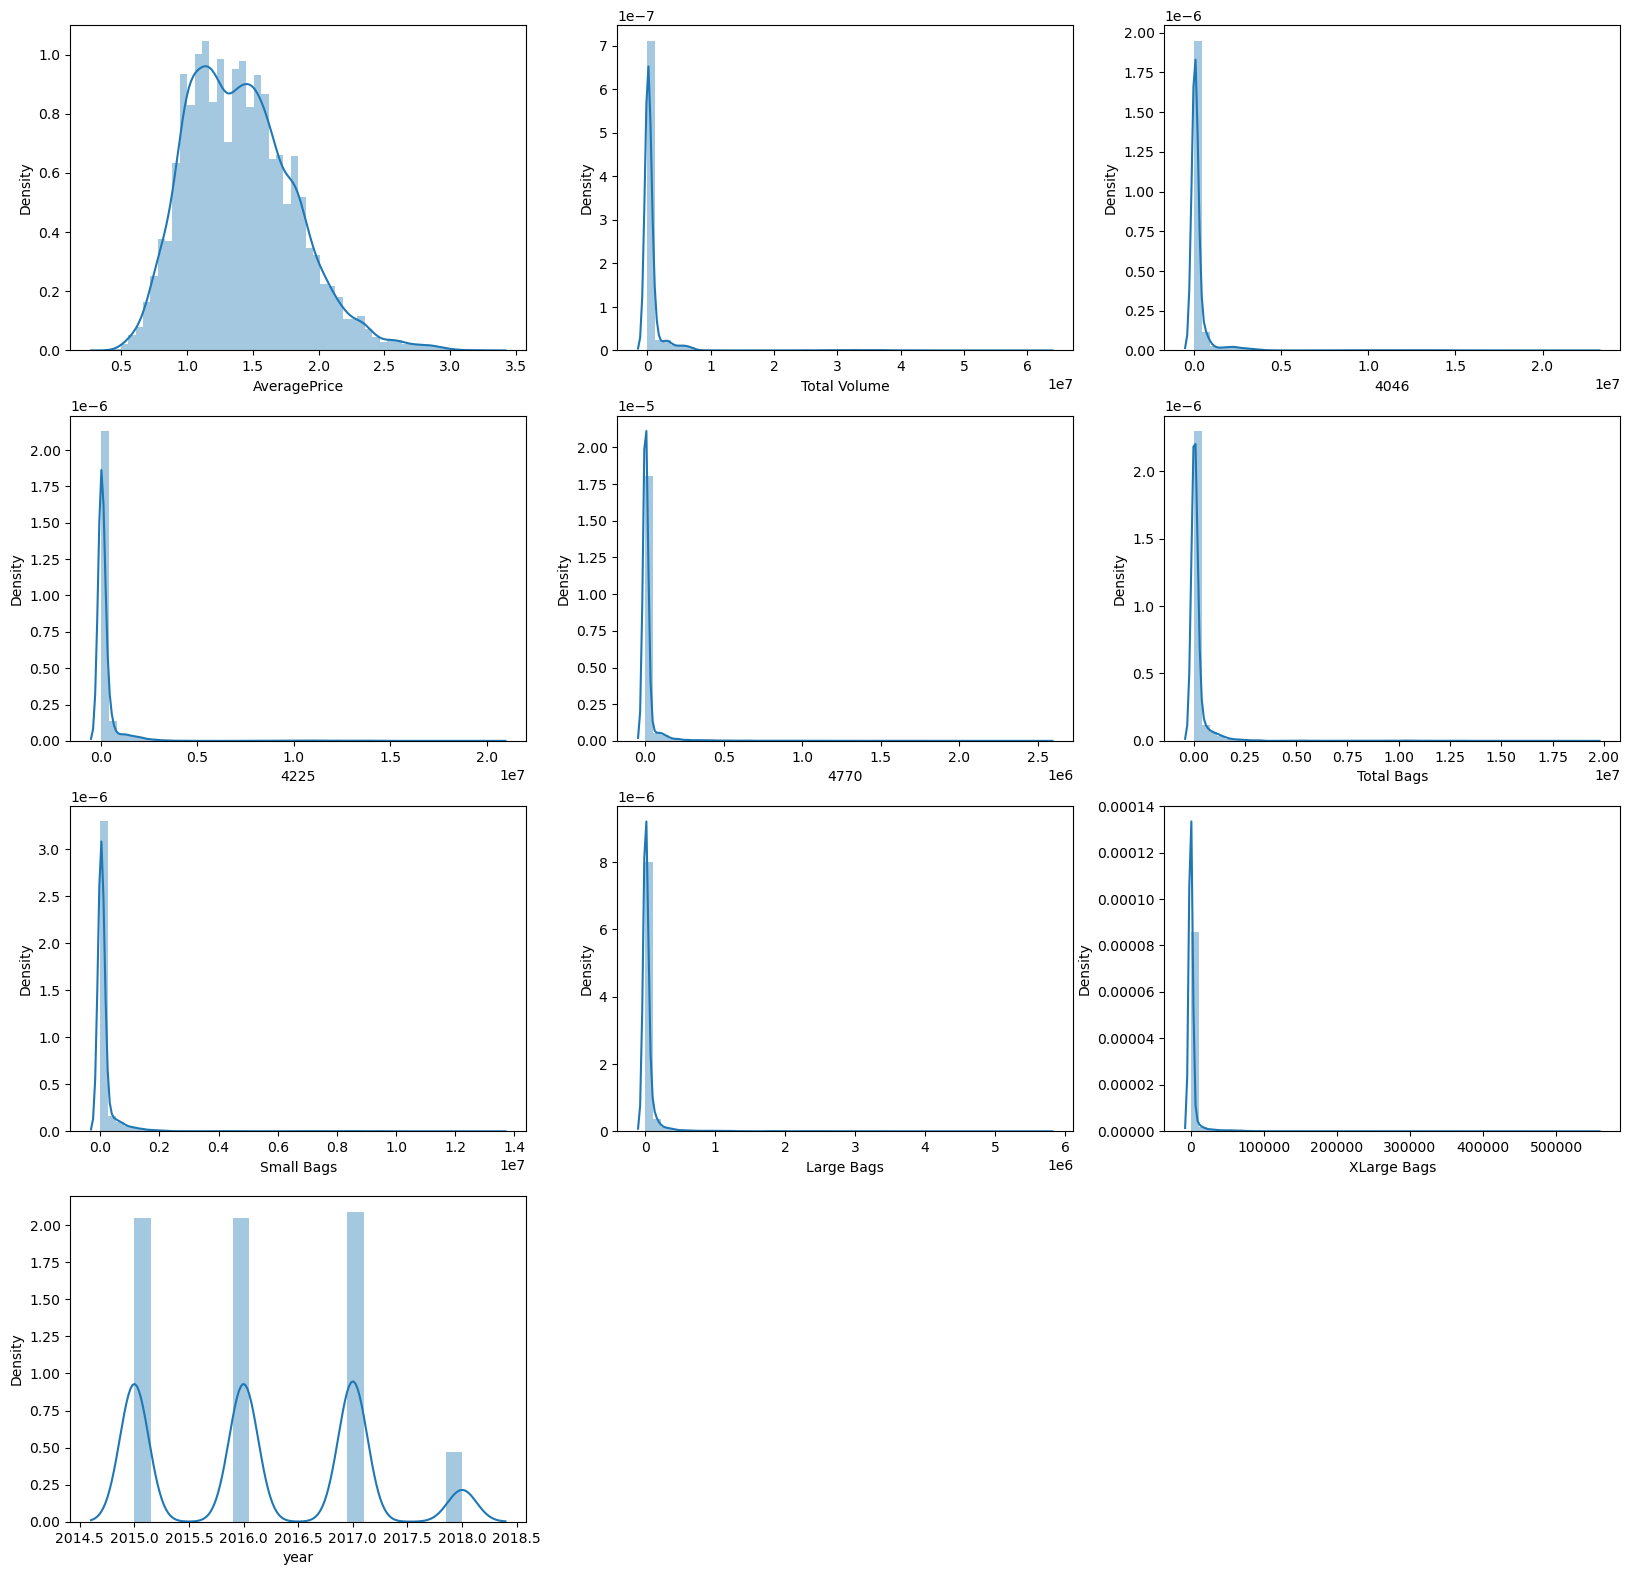

In [13]:
# univariate analysis of numerical features

numerical_col = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20,60),facecolor='white')

plotnumber=1
for i in numerical_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

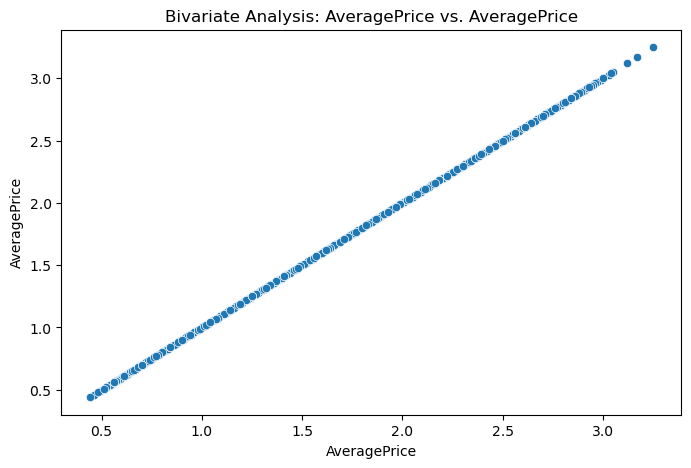

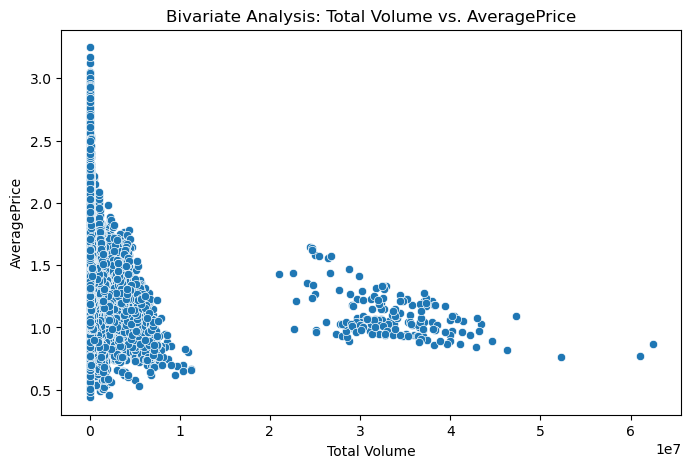

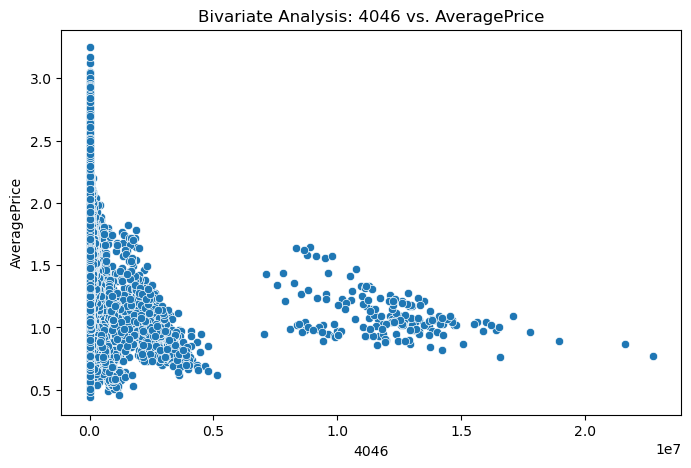

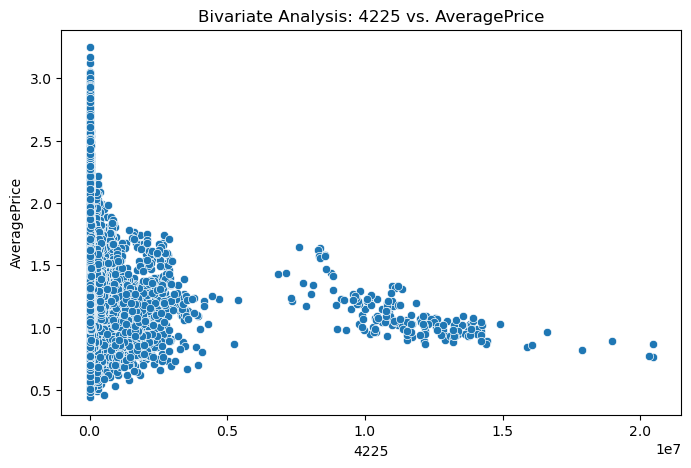

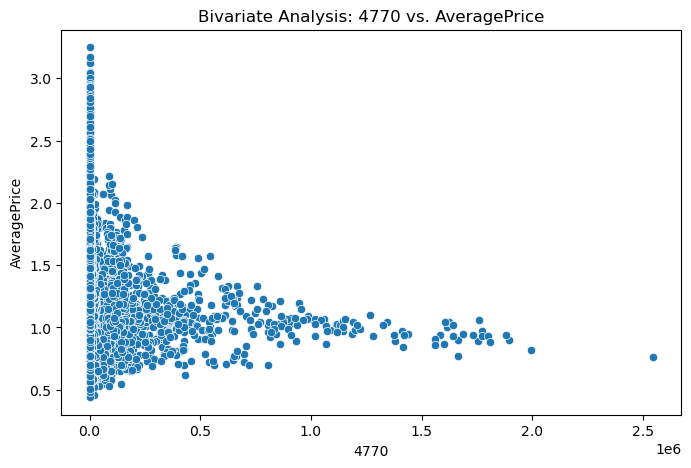

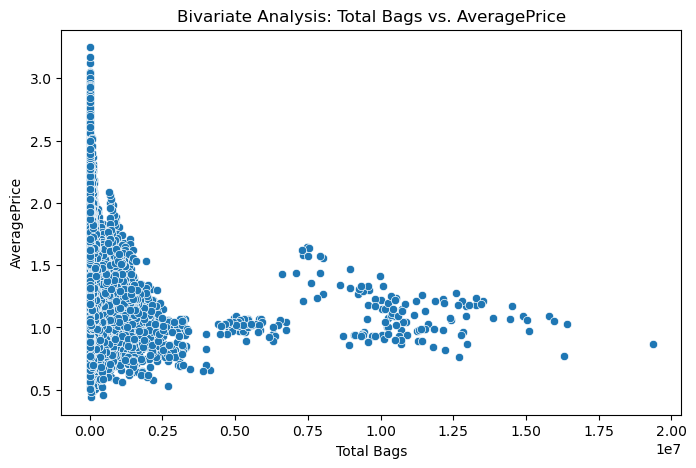

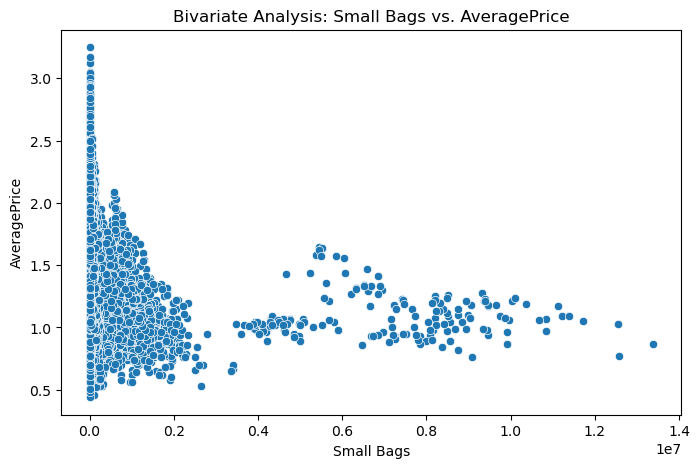

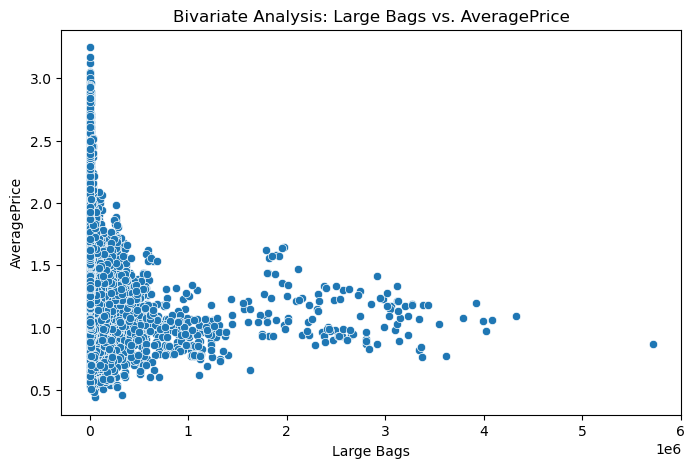

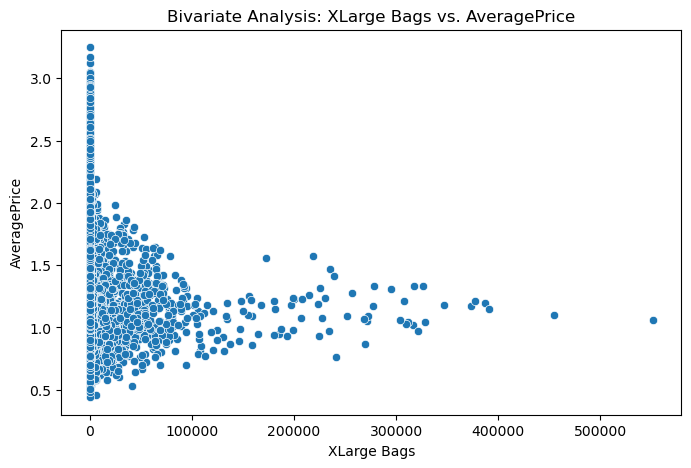

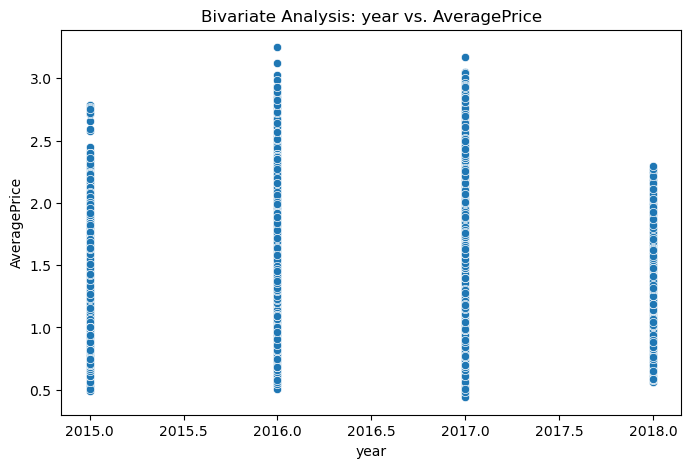

In [14]:
for column in numerical_col:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=column, y='AveragePrice', data=df)
    plt.title(f'Bivariate Analysis: {column} vs. AveragePrice')
    plt.show()

<Figure size 1200x800 with 0 Axes>

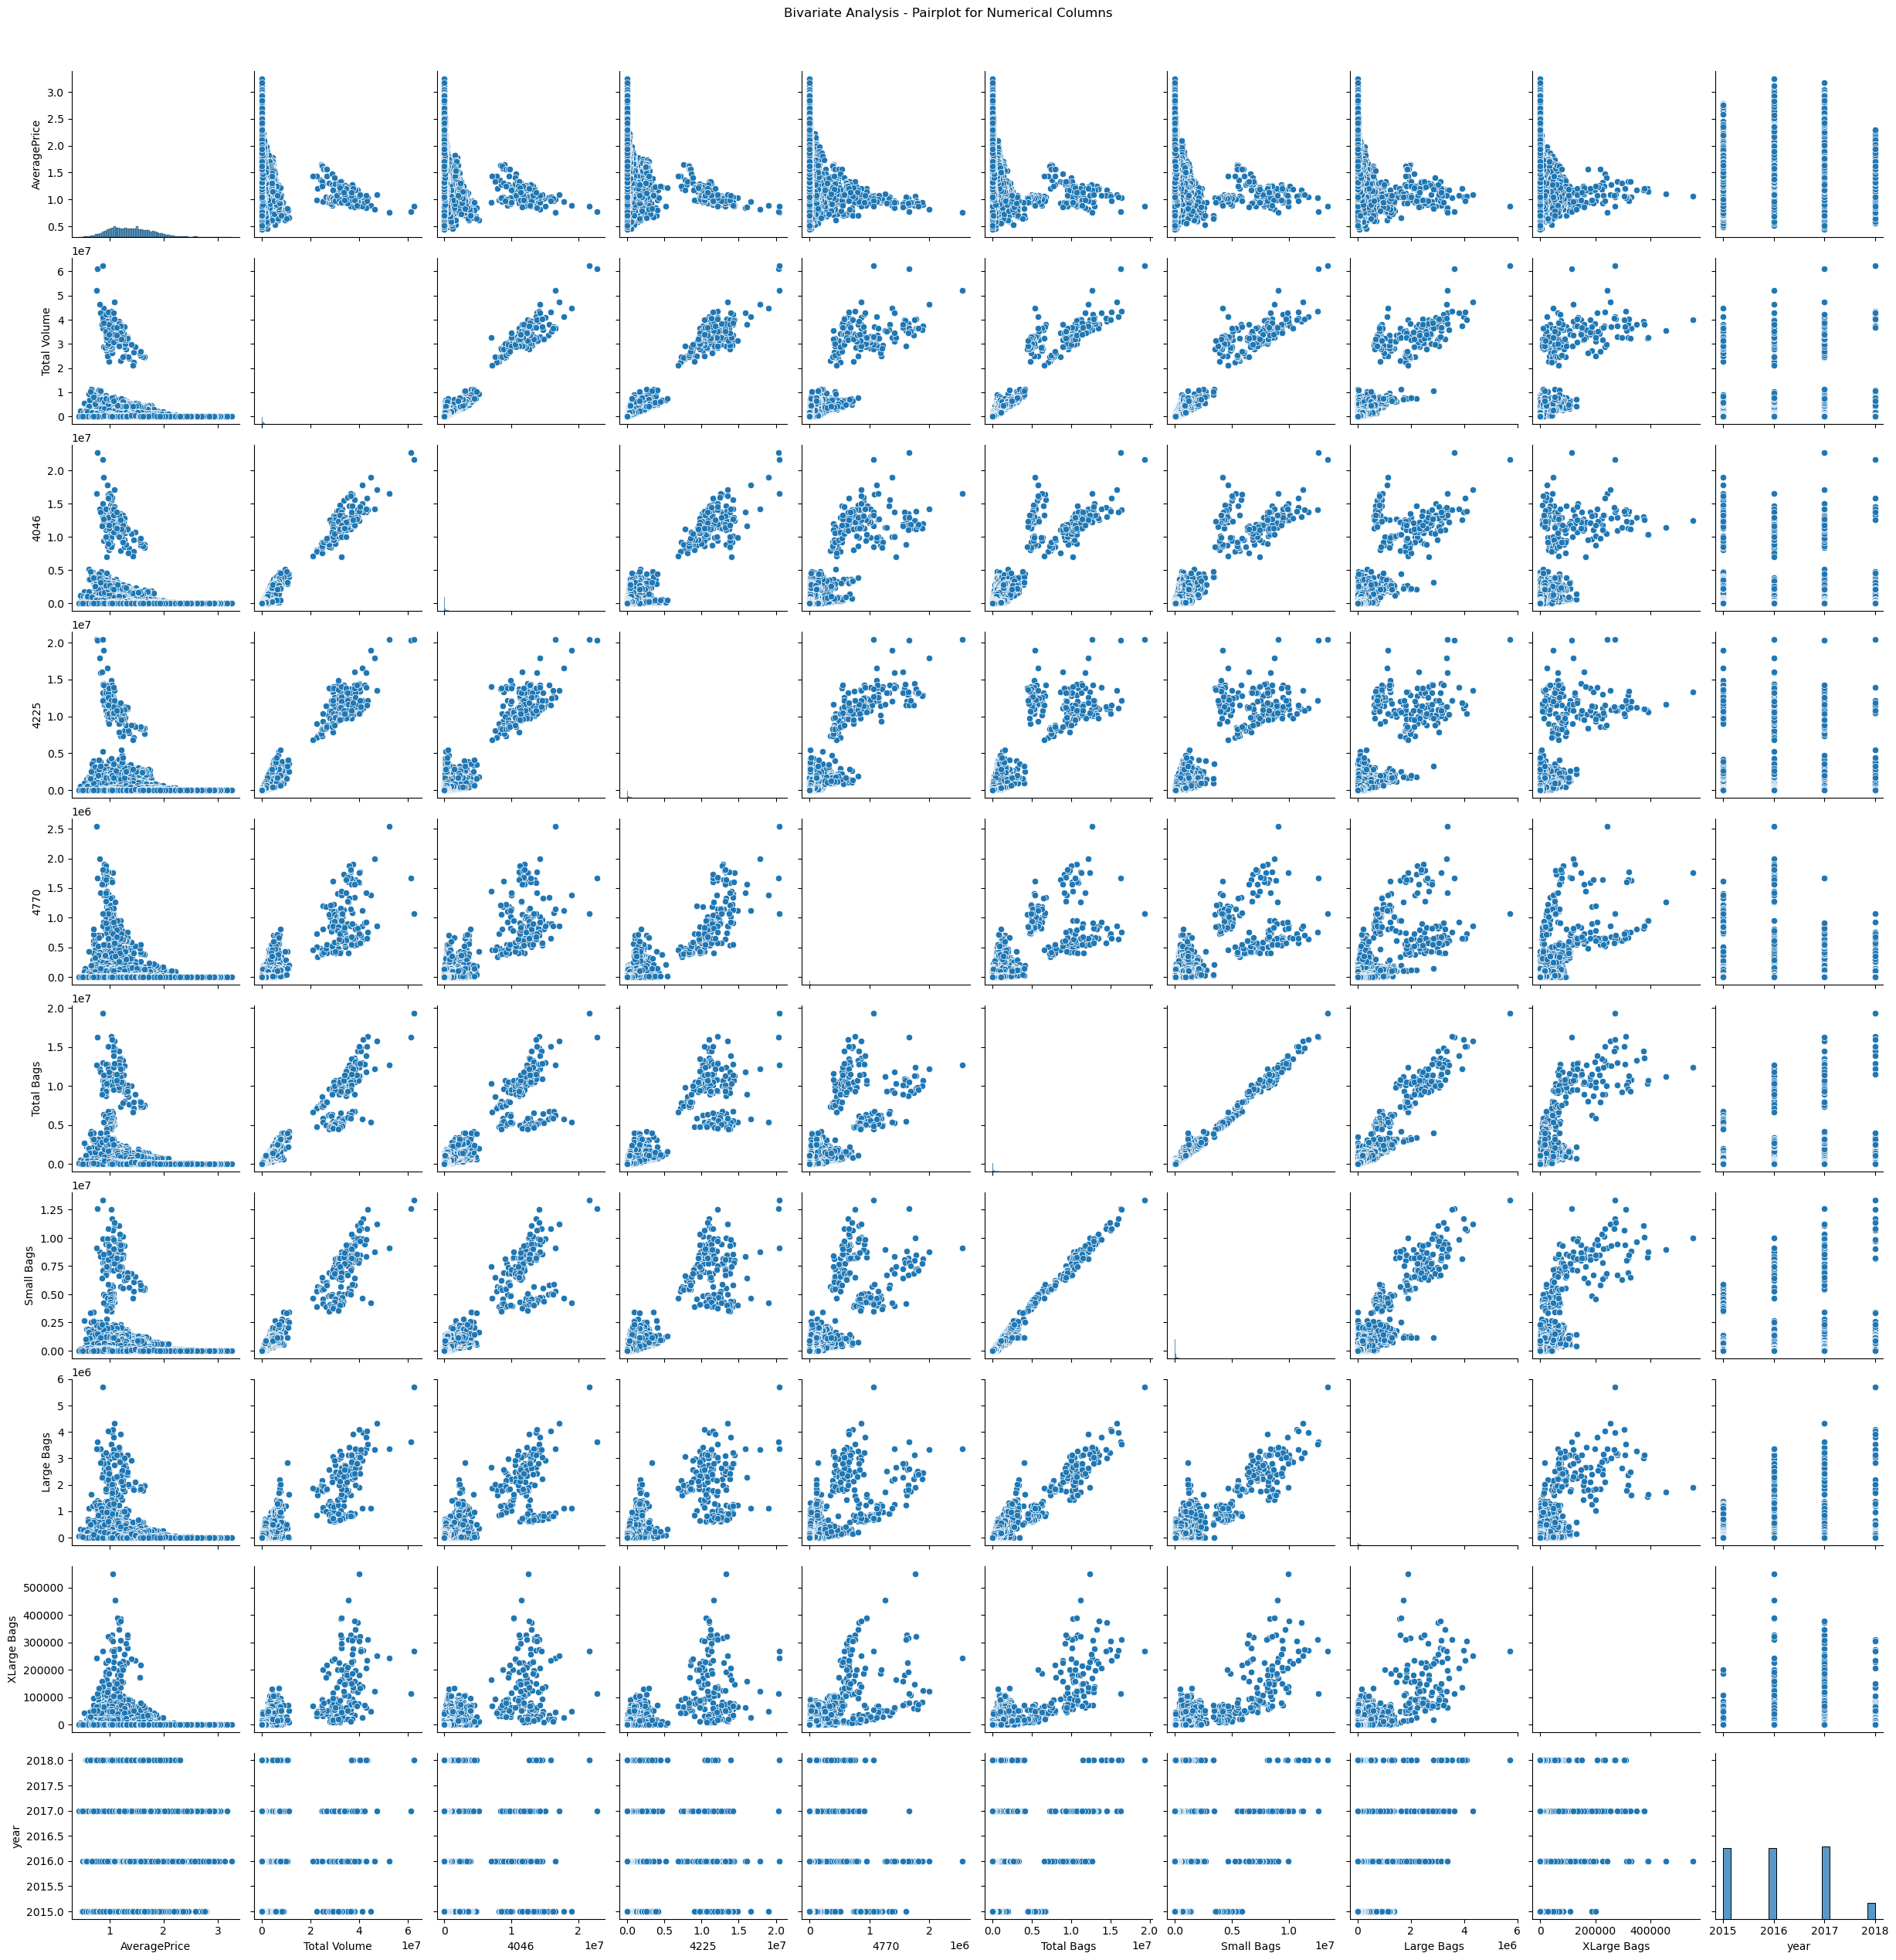

In [15]:
# Pairplot for numerical columns
plt.figure(figsize=(12, 8))
sns.pairplot(df[numerical_col])
plt.suptitle('Bivariate Analysis - Pairplot for Numerical Columns', y=1.02)
plt.show()

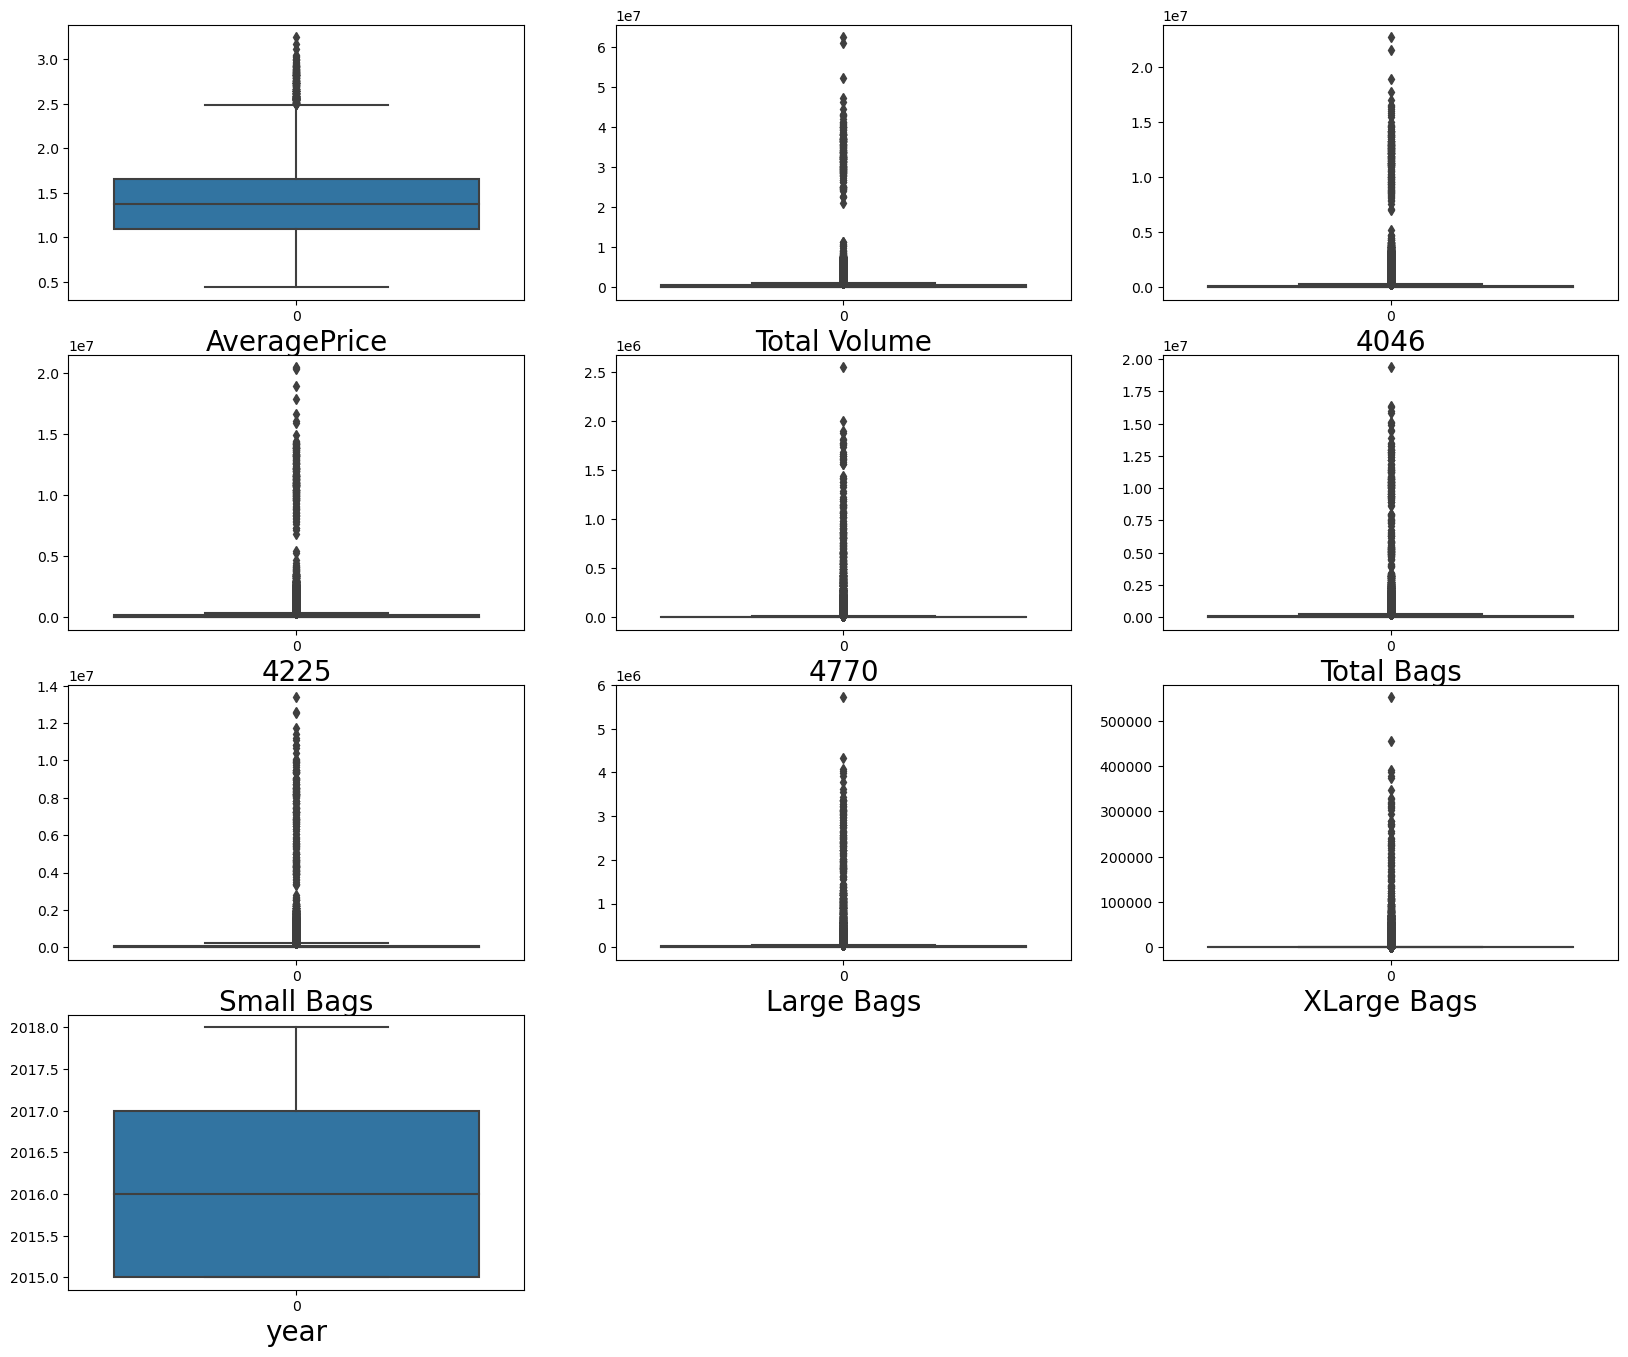

In [16]:
# Visualizing the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in numerical_col:
    if graph<=16: 
        plt.subplot (6,3,graph) 
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    
    graph+=1
plt.show()

There are outliers present in almost every column. We will remove them by using IQR or Zscore.

In [13]:
df.shape

(18249, 13)

In [14]:
out_features=df[['Small Bags','Large Bags','XLarge Bags','Total Volume','4046','4225','4770','Total Bags']]

Q1=out_features.quantile (0.25)
Q3=out_features.quantile (0.75)

IQR=Q3- Q1

df1=df[~((df< (Q1-1.5 *IQR)) | (df> (Q3 + 1.5* IQR))).any (axis=1)]

In [15]:
df1.shape

(11747, 13)

In [16]:
print("Data Loss Percentage After removing outliers with IQR method-", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with IQR method- 35.62934955340019


In [17]:
from scipy.stats import zscore
z = np.abs(zscore(out_features))
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([4, 4, 2, ..., 1, 1, 1], dtype=int64))

In [18]:
df2 = df[(z<3).all(axis=1)]
df2.shape

(17782, 13)

In [19]:
print("Data Loss Percentage After removing outliers with IQR method-", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with IQR method- 2.55904433119623


Apparently Data loss percentage is lower when using zscore as compared to IQR, so we will consider zscore method.

In [20]:
df=df2

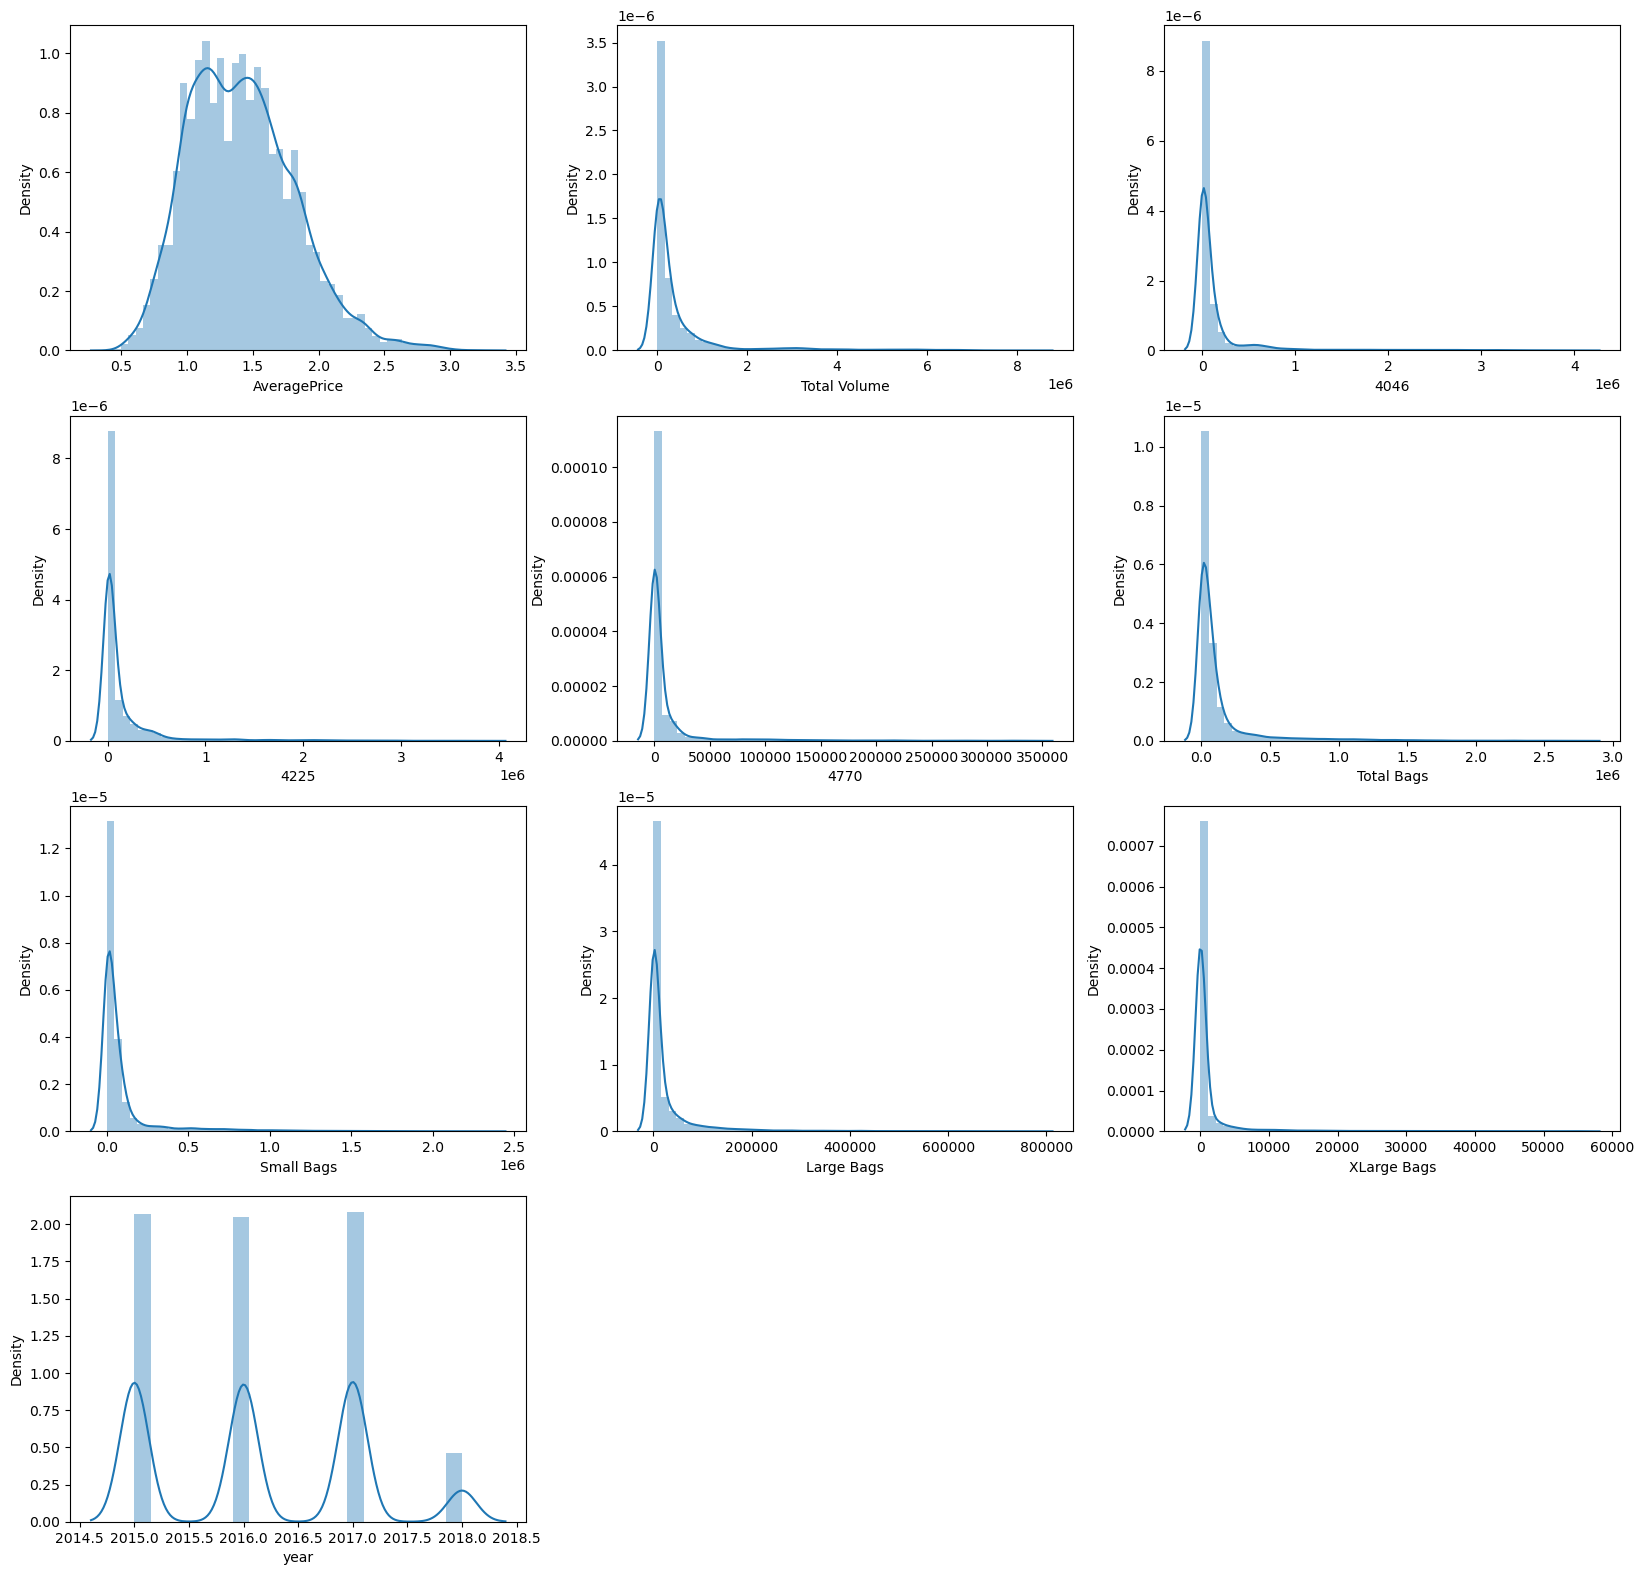

In [25]:
# Again Visualizing how the data is distributed after removing outliers
plt.figure(figsize=(20,60),facecolor='white')

plotnumber=1
for i in numerical_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

In [21]:
# checking skewness
df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
dtype: float64

In [22]:
skewed_columns = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

for column in skewed_columns:
    df[column] = np.cbrt(df[column])

In [23]:
df.skew()

AveragePrice    0.560969
Total Volume    1.248634
4046            1.564617
4225            1.286719
4770            1.645148
Total Bags      1.237136
Small Bags      1.251353
Large Bags      1.282704
XLarge Bags     2.288933
year            0.220792
dtype: float64

In [24]:
skewed_columns = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

for column in skewed_columns:
    df[column] = np.sqrt(df[column])

In [25]:
df.skew()

AveragePrice    0.560969
Total Volume    0.560291
4046            0.579593
4225            0.394449
4770            0.420609
Total Bags      0.438632
Small Bags      0.278061
Large Bags      0.024225
XLarge Bags     1.317499
year            0.220792
dtype: float64

In [26]:
df['XLarge Bags'] = df['XLarge Bags'] ** 2

In [27]:
df.skew()

AveragePrice    0.560969
Total Volume    0.560291
4046            0.579593
4225            0.394449
4770            0.420609
Total Bags      0.438632
Small Bags      0.278061
Large Bags      0.024225
XLarge Bags     2.288933
year            0.220792
dtype: float64

In [28]:
from scipy.stats import yeojohnson

# Applying Yeo-Johnson transformation
df['XLarge Bags'], _ = yeojohnson(df['XLarge Bags'] + 1)


In [29]:
df.skew()

AveragePrice    0.560969
Total Volume    0.560291
4046            0.579593
4225            0.394449
4770            0.420609
Total Bags      0.438632
Small Bags      0.278061
Large Bags      0.024225
XLarge Bags     0.836824
year            0.220792
dtype: float64

In [30]:
df['XLarge Bags'] = np.exp(df['XLarge Bags'])

In [31]:
df.skew()

AveragePrice    0.560969
Total Volume    0.560291
4046            0.579593
4225            0.394449
4770            0.420609
Total Bags      0.438632
Small Bags      0.278061
Large Bags      0.024225
XLarge Bags     0.850593
year            0.220792
dtype: float64

WE have skewness and outliers completely now we ll check the correlation.(we will kwwp XLarge bags skewness as it is as even after applying many transformations it still presist.

In [32]:
cor=df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.562769,-0.556846,-0.451399,-0.485997,-0.549423,-0.489409,-0.472600,-0.388337,0.099910
Total Volume,-0.562769,1.000000,0.901932,0.936214,0.824904,0.950631,0.920302,0.692559,0.646031,0.055746
4046,-0.556846,0.901932,1.000000,0.767527,0.742936,0.827516,0.803063,0.623280,0.590144,-0.005076
4225,-0.451399,0.936214,0.767527,1.000000,0.806319,0.847689,0.818226,0.616606,0.598257,-0.011313
4770,-0.485997,0.824904,0.742936,0.806319,1.000000,0.765504,0.757615,0.541493,0.629892,-0.066675
Total Bags,-0.549423,0.950631,0.827516,0.847689,0.765504,1.000000,0.957504,0.744656,0.629212,0.194736
Small Bags,-0.489409,0.920302,0.803063,0.818226,0.757615,0.957504,1.000000,0.589507,0.615302,0.177566
Large Bags,-0.472600,0.692559,0.623280,0.616606,0.541493,0.744656,0.589507,1.000000,0.455559,0.197324
XLarge Bags,-0.388337,0.646031,0.590144,0.598257,0.629892,0.629212,0.615302,0.455559,1.000000,0.159860
year,0.099910,0.055746,-0.005076,-0.011313,-0.066675,0.194736,0.177566,0.197324,0.159860,1.000000


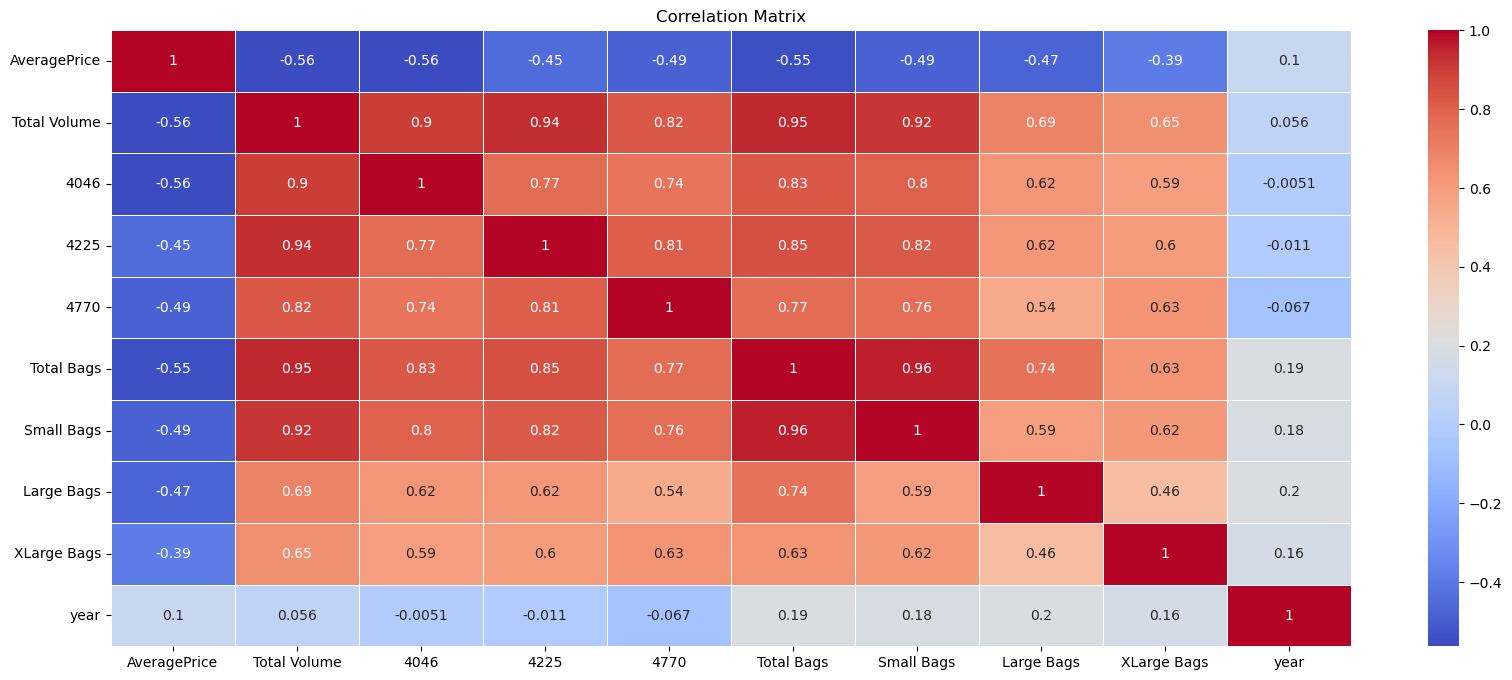

In [33]:
# visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

No strong relation is visible here according to the corelation heatmap.

In [34]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [35]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

cols = ['type', 'region']
for col in cols:
    df[col] = OE.fit_transform(df[col].values.reshape(-1, 1))
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,6.328447,3.181351,6.156579,1.907426,4.534825,4.526684,2.129486,1.557055,0.0,2015,0.0
1,2015-12-20,1.35,6.164507,2.961238,5.955965,1.969316,4.602526,4.594625,2.145326,1.557055,0.0,2015,0.0
2,2015-12-13,0.93,7.005653,3.043457,6.913061,2.252173,4.485577,4.476060,2.165565,1.557055,0.0,2015,0.0
3,2015-12-06,1.08,6.550342,3.228304,6.449584,2.042378,4.240110,4.223686,2.261454,1.557055,0.0,2015,0.0
4,2015-11-29,1.28,6.090476,3.130655,5.938031,2.057118,4.284278,4.261141,2.413593,1.557055,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,5.074494,3.563293,3.394252,0.000000,4.879573,4.853201,2.749300,1.557055,1.0,2018,53.0
18245,2018-01-28,1.71,4.902755,3.256076,3.883715,0.000000,4.582892,4.555715,2.621819,1.557055,1.0,2018,53.0
18246,2018-01-21,1.87,4.895593,3.256176,3.672344,2.999273,4.593488,4.590034,1.866697,1.557055,1.0,2018,53.0
18247,2018-01-14,1.93,5.030477,3.393671,3.793685,2.998634,4.713730,4.710143,1.919383,1.557055,1.0,2018,53.0


In [36]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,6.328447,3.181351,6.156579,1.907426,4.534825,4.526684,2.129486,1.557055,0.0,2015,0.0
1,2015-12-20,1.35,6.164507,2.961238,5.955965,1.969316,4.602526,4.594625,2.145326,1.557055,0.0,2015,0.0
2,2015-12-13,0.93,7.005653,3.043457,6.913061,2.252173,4.485577,4.476060,2.165565,1.557055,0.0,2015,0.0
3,2015-12-06,1.08,6.550342,3.228304,6.449584,2.042378,4.240110,4.223686,2.261454,1.557055,0.0,2015,0.0
4,2015-11-29,1.28,6.090476,3.130655,5.938031,2.057118,4.284278,4.261141,2.413593,1.557055,0.0,2015,0.0


In [37]:
# Converting the datatype of Date column from object to datetime
df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d')

In [38]:
df.set_index('Date',inplace=True)

In [39]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,6.328447,3.181351,6.156579,1.907426,4.534825,4.526684,2.129486,1.557055,0.0,2015,0.0
2015-12-20,1.35,6.164507,2.961238,5.955965,1.969316,4.602526,4.594625,2.145326,1.557055,0.0,2015,0.0
2015-12-13,0.93,7.005653,3.043457,6.913061,2.252173,4.485577,4.476060,2.165565,1.557055,0.0,2015,0.0
2015-12-06,1.08,6.550342,3.228304,6.449584,2.042378,4.240110,4.223686,2.261454,1.557055,0.0,2015,0.0
2015-11-29,1.28,6.090476,3.130655,5.938031,2.057118,4.284278,4.261141,2.413593,1.557055,0.0,2015,0.0


According to the question

we have 2 Tasks: One of Classification and other of Regression

we will start with Classification where target variable will be 'region'.

In [40]:
x = df.drop('region', axis=1)

y = df['region']

In [41]:
# standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.212660,-0.226032,-0.712865,0.265863,-0.267087,-0.593471,-0.395068,-0.693674,-0.678367,-1.026443,-1.214908
1,-0.162942,-0.292247,-0.800331,0.179022,-0.238253,-0.558665,-0.361042,-0.686402,-0.678367,-1.026443,-1.214908
2,-1.207026,0.047491,-0.767660,0.593326,-0.106472,-0.618789,-0.420421,-0.677110,-0.678367,-1.026443,-1.214908
3,-0.834139,-0.136408,-0.694207,0.392698,-0.204214,-0.744986,-0.546813,-0.633087,-0.678367,-1.026443,-1.214908
4,-0.336956,-0.322148,-0.733010,0.171259,-0.197347,-0.722278,-0.528055,-0.563239,-0.678367,-1.026443,-1.214908
...,...,...,...,...,...,...,...,...,...,...,...
17777,0.533114,-0.732502,-0.561093,-0.929883,-1.155744,-0.416233,-0.231544,-0.409113,-0.678367,0.974238,1.979143
17778,0.731987,-0.801868,-0.683172,-0.718006,-1.155744,-0.568759,-0.380529,-0.467641,-0.678367,0.974238,1.979143
17779,1.129733,-0.804760,-0.683132,-0.809503,0.241597,-0.563311,-0.363342,-0.814323,-0.678367,0.974238,1.979143
17780,1.278888,-0.750281,-0.628496,-0.756978,0.241299,-0.501494,-0.303190,-0.790134,-0.678367,0.974238,1.979143


In [42]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

        Variable        VIF
0   AveragePrice   2.048408
1   Total Volume  91.107190
2           4046  10.387136
3           4225  19.142008
4           4770   3.863289
5     Total Bags  46.995974
6     Small Bags  21.852572
7     Large Bags   3.920254
8    XLarge Bags   2.109216
9           type   3.730779
10          year   1.448096


Here Total Volume shows high vif value which indicates of multicollinearity but the column is crucial for the further procedure so , will not delete it.

In [43]:
# Checking for best random state and accuracy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_RS = None
best_accuracy = 0.0

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    model = DecisionTreeClassifier()

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_RS = i

print(f'Best Random State: {best_RS}')
print(f'Best Accuracy: {best_accuracy:.2f}')


Best Random State: 22
Best Accuracy: 0.81


In [44]:
#splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_RS)

Now, We will train, evaluate and cross-validate the models. The results, including accuracy, classification report, confusion matrix, and cross-validation scores, will be printed for each model.

In [45]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score 
from sklearn.model_selection import cross_val_score

In [46]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Cross-validation
    score = cross_val_score(model, x, y, cv=5, scoring="accuracy")
    
    # Printing results
    print(f"Results for {model_name}:")
    print('Accuracy: ', accuracy)
    print('Classification Report:\n', classification_rep)
    print('Confusion Matrix:\n', conf_matrix)
    
    # Cross-validating scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between Accuracy and cross-validation score is", (accuracy - score.mean()) * 100)
    
    print("\n" + "="*40 + "\n")


Results for LogisticRegression:
Accuracy:  0.5430178069353327
Classification Report:
               precision    recall  f1-score   support

         0.0       0.56      0.66      0.61       101
         1.0       0.25      0.32      0.28       111
         2.0       0.79      0.62      0.70       109
         3.0       0.54      0.50      0.52        90
         4.0       0.60      0.56      0.58       108
         5.0       0.51      0.55      0.53       100
         6.0       0.76      0.82      0.79        89
         7.0       0.62      0.75      0.68        96
         8.0       0.73      0.86      0.79       105
         9.0       0.52      0.78      0.62        98
        10.0       0.44      0.47      0.45        94
        11.0       0.62      0.62      0.62       110
        12.0       0.46      0.45      0.45       100
        13.0       0.42      0.25      0.31       100
        14.0       0.62      0.50      0.55       107
        15.0       0.63      0.57      0.60      

Results for SVC:
Accuracy:  0.8001874414245548
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.91      0.80       101
         1.0       0.51      0.60      0.55       111
         2.0       0.99      0.86      0.92       109
         3.0       0.70      0.82      0.76        90
         4.0       0.85      0.86      0.86       108
         5.0       0.78      0.74      0.76       100
         6.0       0.97      0.97      0.97        89
         7.0       0.76      0.77      0.77        96
         8.0       0.99      0.99      0.99       105
         9.0       0.65      0.86      0.74        98
        10.0       0.64      0.74      0.69        94
        11.0       0.93      0.91      0.92       110
        12.0       0.90      0.94      0.92       100
        13.0       0.66      0.60      0.63       100
        14.0       0.87      0.83      0.85       107
        15.0       0.97      0.97      0.97        79
        16

Results for ExtraTreesClassifier:
Accuracy:  0.9207122774133083
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       101
         1.0       0.90      0.86      0.88       111
         2.0       0.98      0.99      0.99       109
         3.0       0.88      0.91      0.90        90
         4.0       0.94      1.00      0.97       108
         5.0       0.88      0.82      0.85       100
         6.0       0.99      0.99      0.99        89
         7.0       0.95      0.94      0.94        96
         8.0       0.98      0.99      0.99       105
         9.0       0.89      0.94      0.92        98
        10.0       0.83      0.82      0.82        94
        11.0       0.95      0.96      0.95       110
        12.0       0.97      0.95      0.96       100
        13.0       0.85      0.84      0.84       100
        14.0       0.93      0.93      0.93       107
        15.0       0.99      0.99      0.99    

The RandomForestClassifier has the highest accuracy and had the smallest difference between accuracy and cross-validation score. Therefore, the RandomForestClassifier is the best model.

Hyper parameter tunning

In [47]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')


In [48]:
# Fittng the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [49]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [50]:
best_model = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred = best_model.predict(x_test)

# Evaluating the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       101
         1.0       0.90      0.86      0.88       111
         2.0       0.98      0.99      0.99       109
         3.0       0.88      0.91      0.90        90
         4.0       0.94      1.00      0.97       108
         5.0       0.88      0.82      0.85       100
         6.0       0.99      0.99      0.99        89
         7.0       0.95      0.94      0.94        96
         8.0       0.98      0.99      0.99       105
         9.0       0.89      0.94      0.92        98
        10.0       0.83      0.82      0.82        94
        11.0       0.95      0.96      0.95       110
        12.0       0.97      0.95      0.96       100
        13.0       0.85      0.84      0.84       100
        14.0       0.93      0.93      0.93       107
        15.0       0.99      0.99      0.99        79
        16.0       0.94      0.95      0.9

In [51]:
#Saving the model using .pkl
import joblib
joblib.dump(best_model, "Region_classification.pkl")

['Region_classification.pkl']

In [52]:
# loading the saved model and get the predictions
model=joblib.load("Region_classification.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([11., 34., 22., ...,  7., 40.,  1.])

In [53]:
a = np.array(y_test)
df4 = pd.DataFrame()
df4["Predicted"] = prediction
df4["Original"] = a
df4

,Predicted,Original
0,11.0,11.0
1,34.0,34.0
2,22.0,22.0
3,39.0,39.0
4,2.0,2.0
...,...,...
5330,27.0,27.0
5331,3.0,3.0
5332,7.0,7.0
5333,40.0,40.0


We have completed classification problem where label was region. Now we will move ahead to solve regression problem where target variable is Average Price.

In [54]:
x2 = df.drop('AveragePrice',axis=1)
y2= df['AveragePrice']

In [55]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x2 = pd.DataFrame(scaler.fit_transform(x2),columns=x2.columns)
x2

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.226032,-0.712865,0.265863,-0.267087,-0.593471,-0.395068,-0.693674,-0.678367,-1.026443,-1.214908,-1.698613
1,-0.292247,-0.800331,0.179022,-0.238253,-0.558665,-0.361042,-0.686402,-0.678367,-1.026443,-1.214908,-1.698613
2,0.047491,-0.767660,0.593326,-0.106472,-0.618789,-0.420421,-0.677110,-0.678367,-1.026443,-1.214908,-1.698613
3,-0.136408,-0.694207,0.392698,-0.204214,-0.744986,-0.546813,-0.633087,-0.678367,-1.026443,-1.214908,-1.698613
4,-0.322148,-0.733010,0.171259,-0.197347,-0.722278,-0.528055,-0.563239,-0.678367,-1.026443,-1.214908,-1.698613
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.732502,-0.561093,-0.929883,-1.155744,-0.416233,-0.231544,-0.409113,-0.678367,0.974238,1.979143,1.742552
17778,-0.801868,-0.683172,-0.718006,-1.155744,-0.568759,-0.380529,-0.467641,-0.678367,0.974238,1.979143,1.742552
17779,-0.804760,-0.683132,-0.809503,0.241597,-0.563311,-0.363342,-0.814323,-0.678367,0.974238,1.979143,1.742552
17780,-0.750281,-0.628496,-0.756978,0.241299,-0.501494,-0.303190,-0.790134,-0.678367,0.974238,1.979143,1.742552


In [56]:
# checking variance inflation factor(VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor (x2.values, i) for i in range(len(x2.columns))] 
vif["Features"] = x2.columns
vif

,VIF values,Features
0,89.752555,Total Volume
1,10.873371,4046
2,17.801419,4225
3,3.863576,4770
4,46.455332,Total Bags
5,21.155984,Small Bags
6,3.915195,Large Bags
7,2.107552,XLarge Bags
8,3.207957,type
9,1.379062,year


Here Total Volume shows high vif value which indicates of multicollinearity but the column is crucial for the further procedure so , will not delete it.

In [57]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [58]:
best_RS = None
max_acc = 0
for random_state in range(1, 101): 
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=random_state)

    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    accuracy = r2_score(y_test, predictions)

    if accuracy > max_acc:
        max_acc = accuracy
        best_RS = random_state

print(f'Best Random State: {best_RS}')
print(f'Maximum Accuracy: {max_acc}')

Best Random State: 52
Maximum Accuracy: 0.5317759493873828


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x2, y2, test_size = 0.30, random_state =best_RS)

In [60]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [61]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNN(),
    Lasso(),
    Ridge()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fitting the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train) * 100
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Cross-validation
    score = cross_val_score(model, x2, y2, cv=5, scoring="r2")
    
    # Printing results
    print(f"Results for {model_name}:")
    print('R2_score: ', r2_test)
    print('R2_score on training Data:', r2_train)
    print('Mean Absolute Error:-', mae)
    print('Mean Squared Error:-', mse)
    print("Root Mean Squared Error:-", rmse)
    
     # Cross-validation scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between R2 score and cross-validation score is", (r2_test - score.mean()) * 100)
   
    
    print("\n" + "="*40 + "\n")

Results for LinearRegression:
R2_score:  0.5261479714724957
R2_score on training Data: 50.79445559648418
Mean Absolute Error:- 0.21701048358400718
Mean Squared Error:- 0.07841965109802708
Root Mean Squared Error:- 0.2800350890478318
Cross-validation scores: [-0.12906521  0.10269113  0.40149461  0.19399268  0.18904149]
Mean Cross-validation score: 0.15163094019407455
Difference between R2 score and cross-validation score is 37.451703127842116


Results for RandomForestRegressor:
R2_score:  0.8459931180349727
R2_score on training Data: 97.72092005874762
Mean Absolute Error:- 0.11240204311152764
Mean Squared Error:- 0.025487209557638238
Root Mean Squared Error:- 0.15964714077501743
Cross-validation scores: [0.24218751 0.31386598 0.55062666 0.27627391 0.04054837]
Mean Cross-validation score: 0.28470048582934276
Difference between R2 score and cross-validation score is 56.129263220563


Results for DecisionTreeRegressor:
R2_score:  0.676324312139838
R2_score on training Data: 100.0
Mean Abs

Random Forest Regressor is the best model for this dataset. It has the highest R2 score, the lowest MAE, and a relatively low RMSE. Additionally, the cross-validation score is reasonable, indicating good generalization performance.

In [62]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [63]:
# Initializing GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring='accuracy')


In [64]:
# Fittng the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [65]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [66]:
best_model = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred = best_model.predict(x_test)

print("R2_score: ",r2_score (y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred)))



R2_score:  0.8452679536247
Mean Absolute Error:- 0.11279216494845362
Mean Squared Error:- 0.025607219891283978
Root Mean Squared Error:- 0.1600225605697021


In [67]:
import joblib
joblib.dump(best_model, "AveragePrice_Reg.pkl")

['AveragePrice_Reg.pkl']

In [68]:
# loading the saved model and getting the predictions
model=joblib.load("AveragePrice_Reg.pkl")

# Prediction
prediction = best_model.predict(x_test)
prediction

array([1.1554, 1.95  , 1.085 , ..., 1.5954, 1.62  , 1.603 ])

In [69]:
a = np.array(y_test)
df5 = pd.DataFrame()
df5["Predicted"] = prediction
df5["Original"] = a
df5

,Predicted,Original
0,1.1554,1.05
1,1.9500,2.31
2,1.0850,0.79
3,1.8334,1.95
4,1.8574,1.80
...,...,...
5330,1.1864,1.34
5331,2.1038,2.03
5332,1.5954,1.73
5333,1.6200,1.39
